In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../../data/raw/heart_attack_prediction_dataset.csv')

In [3]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### check the details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
data.shape

(8763, 26)

In [9]:
# check the missing values
data.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [10]:
# check the duplicated values
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8758    False
8759    False
8760    False
8761    False
8762    False
Length: 8763, dtype: bool

In [12]:
data.loc[data.duplicated()]

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk


In [13]:
# check the different clases in Heart Attack Risk column
data["Heart Attack Risk"].unique()

array([0, 1])

In [14]:
# count the instances of each class
data["Heart Attack Risk"].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

## Exploratory Data Analysis(EDA)

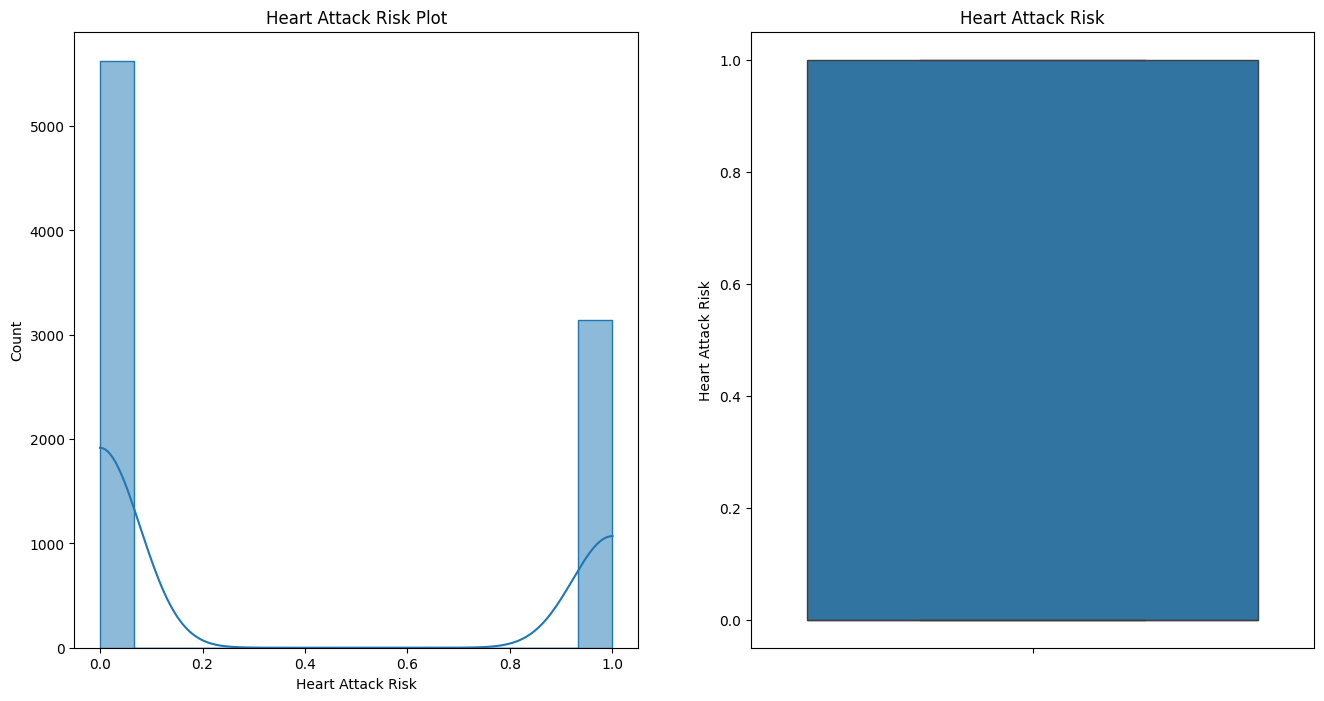

In [16]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.title('Heart Attack Risk Plot')
sns.histplot(data["Heart Attack Risk"], kde=True, element='step')

plt.subplot(1,2,2)
sns.boxplot(data["Heart Attack Risk"])
plt.title('Heart Attack Risk')

plt.show()

### Visualizing Categorical Features

In [17]:
categorical_features = [x for x in data.columns if data[x].dtype =='object']
categorical_features

['Patient ID',
 'Sex',
 'Blood Pressure',
 'Diet',
 'Country',
 'Continent',
 'Hemisphere']

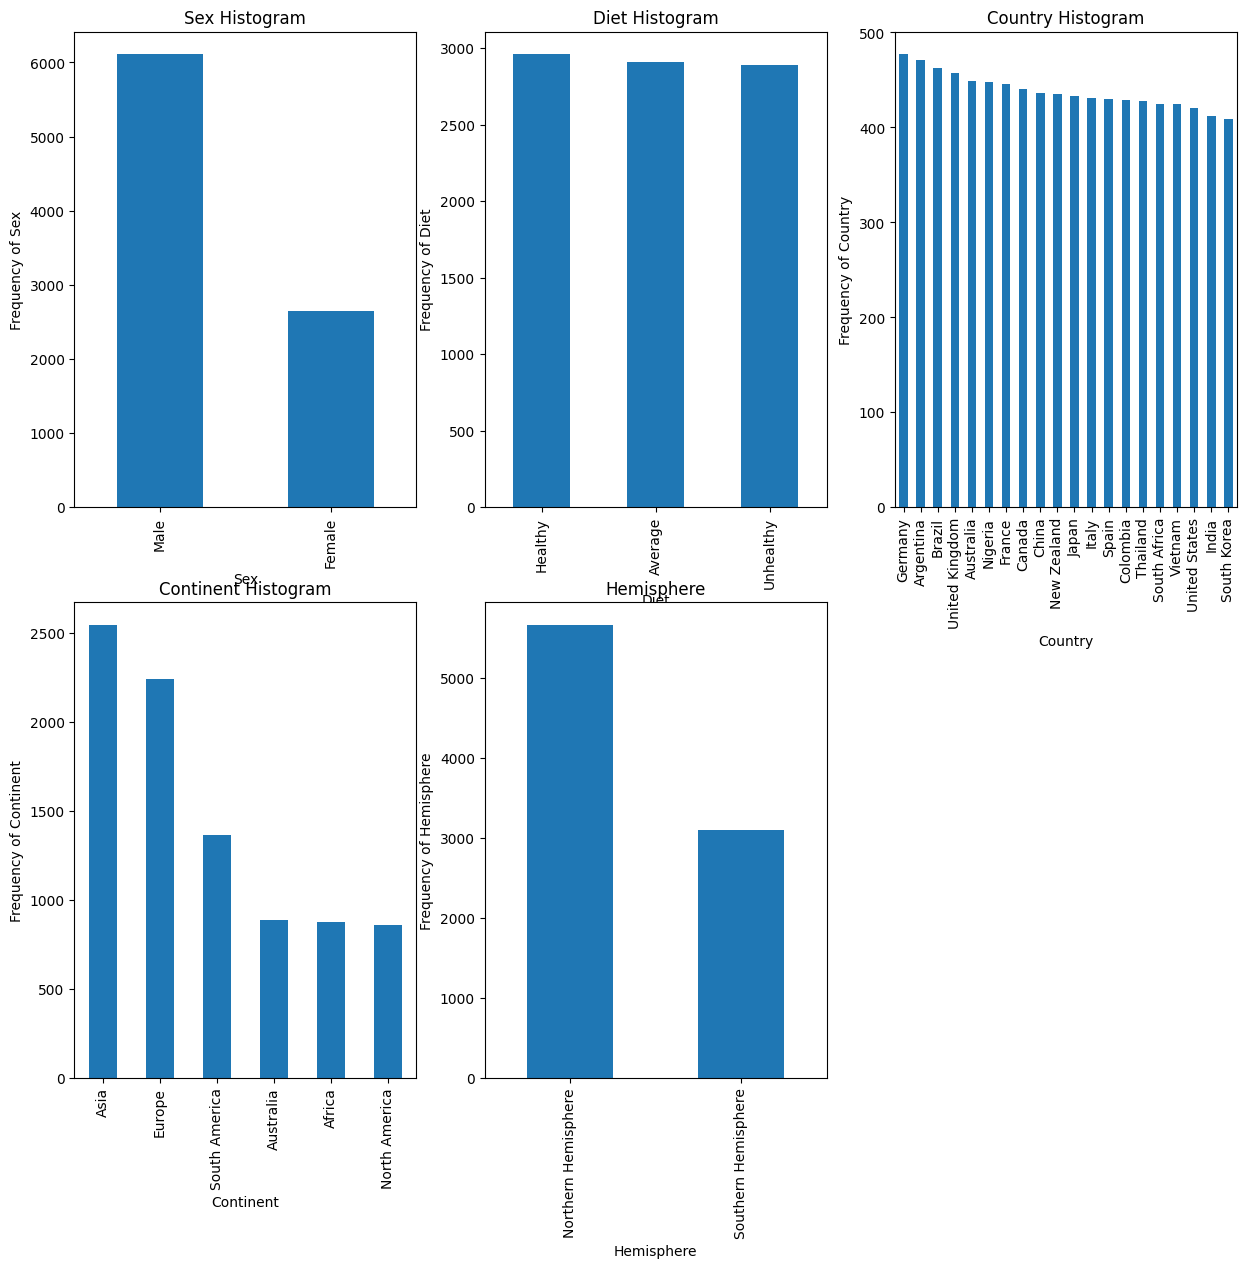

In [21]:
plt.figure(figsize=(15, 21))
'''
plt.subplot(3, 3, 1)
plt1 = data['Patient ID'].value_counts().plot(kind='bar')
plt.title('Patient ID Histogram')
plt1.set(xlabel = 'Patient ID', ylabel='Frequency of Patient ID')
'''
plt.subplot(3, 3, 1)
plt1 = data['Sex'].value_counts().plot(kind='bar')
plt.title('Sex Histogram')
plt1.set(xlabel = 'Sex', ylabel='Frequency of Sex')
'''
plt.subplot(3, 3, 3)
plt1 = data['Blood Pressure'].value_counts().plot(kind='bar')
plt.title('Blood Pressure Histogram')
plt1.set(xlabel = 'Blood Pressure', ylabel='Frequency of Blood Pressure')
'''
plt.subplot(3, 3, 2)
plt1 = data['Diet'].value_counts().plot(kind='bar')
plt.title('Diet Histogram')
plt1.set(xlabel = 'Diet', ylabel='Frequency of Diet')

plt.subplot(3, 3, 3)
plt1 = data['Country'].value_counts().plot(kind='bar')
plt.title('Country Histogram')
plt1.set(xlabel = 'Country', ylabel='Frequency of Country')

plt.subplot(3, 3, 4)
plt1 = data['Continent'].value_counts().plot(kind='bar')
plt.title('Continent Histogram')
plt1.set(xlabel = 'Continent', ylabel='Frequency of Continent')

plt.subplot(3, 3, 5)
plt1 = data['Hemisphere'].value_counts().plot(kind='bar')
plt.title('Hemisphere')
plt1.set(xlabel = 'Hemisphere', ylabel='Frequency of Hemisphere')

plt.show()